In [ ]:
from sklearn.datasets import load_digits
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Dataset Size

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
data= (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Showing the images of the dataset

<Figure size 1440x288 with 0 Axes>

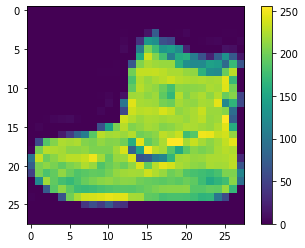

"for index,(image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):\n  plt.subplot(1, 5, index + 1)\n  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)\n  plt.title('Training: %i\n' % label, fontsize = 20)\n\n  "

In [ ]:
plt.figure(figsize=(20,4))
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



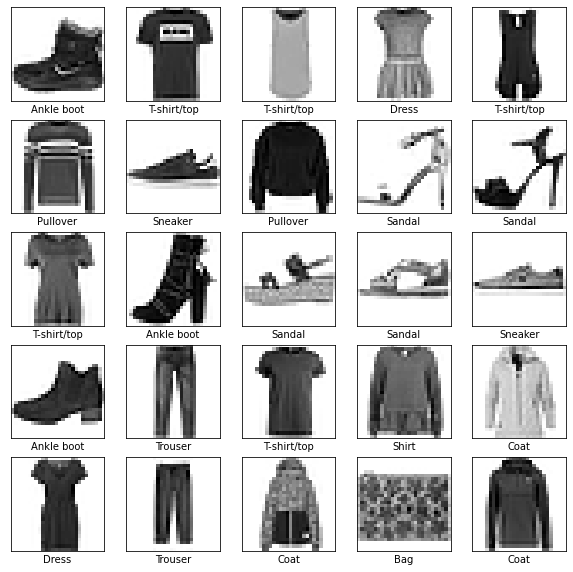

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Split the dataset for trainning and Test

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

xt=[]
yt=[]
for i in range(len(x_train)):
  xt.append(x_train[i].flatten())

for i in range(len(y_train)):
  yt.append(y_train[i].flatten())

xtt=[]
ytt=[]
for i in range(len(x_test)):
  xtt.append(x_test[i].flatten())

for i in range(len(y_test)):
  ytt.append(y_test[i].flatten())



Load MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlperceptron=MLPClassifier(solver='sgd',
                           hidden_layer_sizes=(25),
                           activation='logistic',
                           max_iter=500,
                           early_stopping=True,
                           verbose=False,
                           alpha=0.00001,
                           random_state=2)


In [ ]:
mlperceptron.fit(xtt, ytt)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=25, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
predictions = mlperceptron.predict(xtt)

In [ ]:
# Use score method to get accuracy of model
score = mlperceptron.score(xtt, ytt)
print(score)

0.8209


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(ytt, predictions)
print(cm)

[[857   1  20  59   5   0  45   0  13   0]
 [  3 945  14  29   5   0   2   0   2   0]
 [ 34   1 737   9 152   0  62   0   5   0]
 [ 34   9  12 875  23   0  42   0   5   0]
 [  4   1 124  52 739   1  76   0   3   0]
 [  2   0   0   0   0 832   0  88   8  70]
 [225   1 155  39 142   1 414   0  23   0]
 [  0   0   0   0   0  16   0 940   1  43]
 [  8   0   9   7   4   2  23   6 939   2]
 [  1   0   0   0   0   8   0  59   1 931]]


Text(0.5, 1.0, 'Accuracy Score: 0.8209')

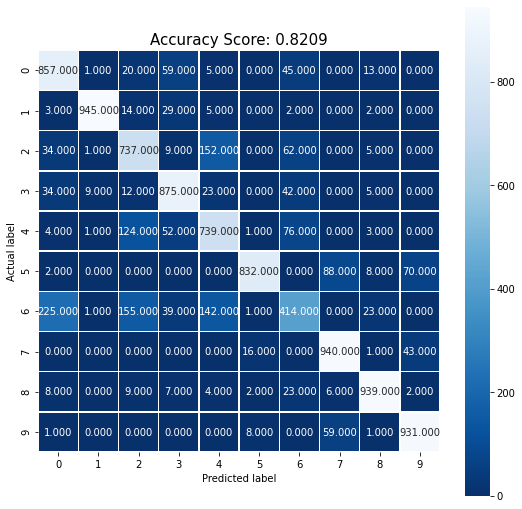

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytt, predictions, normalize=False)
print("Number of Correct predicted: " + str(acc) +" of "+ str(len(ytt)))
print(acc / len(ytt))

Number of Correct predicted: 8209 of 10000
0.8209


In [ ]:
from sklearn.metrics import f1_score
f1_score(ytt, predictions, average='macro')

0.8166535280764166